# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [386]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import numpy as np
import scipy.stats as sts
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib as mpl
import datetime as dt

In [387]:
# File to Load (Remember to change these)
city_data_to_load = os.path.join(r"C:/Users/AYOOLA5\Desktop/University of Toronto/School_District_Analysis/Resources/PyBer_Analysis/Resources/city_data.csv")
ride_data_to_load = os.path.join(r"C:/Users/AYOOLA5\Desktop/University of Toronto/School_District_Analysis/Resources/PyBer_Analysis/Resources/ride_data.csv")

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

In [388]:
# Read the ride data file and store it in a pandas DataFrame.
city_data_df = pd.read_csv(city_data_to_load)
city_data_df .head(10)

,city,driver_count,type
0,Richardfort,38,Urban
1,Williamsstad,59,Urban
2,Port Angela,67,Urban
3,Rodneyfort,34,Urban
4,West Robert,39,Urban
5,West Anthony,70,Urban
6,West Angela,48,Urban
7,Martinezhaven,25,Urban
8,Karenberg,22,Urban
9,Barajasview,26,Urban


In [389]:
ride_data_df = pd.read_csv(ride_data_to_load)
ride_data_df .head(10)

,city,date,fare,ride_id
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12
5,South Latoya,2019-03-11 12:26,9.52,1.995000e+12
6,New Paulville,2019-02-27 11:17,43.25,7.932080e+11
7,Simpsonburgh,2019-04-26 0:43,35.98,1.119540e+11
8,South Karenland,2019-01-08 3:28,35.09,7.995620e+12
9,North Jasmine,2019-03-09 6:26,42.81,5.327640e+12


### Merge the DataFrames

In [390]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


In [391]:
city_data_df["type"].unique()

array(['Urban', 'Suburban', 'Rural'], dtype=object)

## Deliverable 1: Get a Summary DataFrame 

In [392]:
#  1. Get the total rides for each city type
Total_ride_per_citytype  = pyber_data_df.groupby(["type"]).count()["ride_id"]
Total_ride_per_citytype 

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [393]:
# 2. Get the total drivers for each city type
Total_drivers = city_data_df.groupby('type').sum()['driver_count']
Total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [394]:
#  3. Get the total amount of fares for each city type
sum_of_all_the_fares = pyber_data_df.groupby(["type"]).sum()["fare"]
sum_of_all_the_fares

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [395]:
#  4. Get the average fare per ride for each city type. 
avg_fares_by_ride = (sum_of_all_the_fares / Total_ride_per_citytype  )
avg_fares_by_ride

type
Rural       34.623440
Suburban    30.970128
Urban       24.525772
dtype: float64

In [396]:
avg_fare_per_driver = sum_of_all_the_fares / Total_drivers
avg_fare_per_driver

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [397]:
New_Pyber_Summary_df = pd.DataFrame(
          {"Total rides": Total_ride_per_citytype, 
          "Total Drivers": Total_drivers, 
          " Total Fares": sum_of_all_the_fares,
          " Average fare per ride": avg_fares_by_ride, 
          "Average fare per driver": avg_fare_per_driver,})
New_Pyber_Summary_df

,Total rides,Total Drivers,Total Fares,Average fare per ride,Average fare per driver
type,,,,,
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [398]:
#  7. Cleaning up the DataFrame. Delete the index name
New_Pyber_Summary_df.index.name = None

In [399]:
New_Pyber_Summary_df["Total rides"] = New_Pyber_Summary_df["Total rides"].map("{:.0f}".format)
New_Pyber_Summary_df["Total Drivers"] = New_Pyber_Summary_df["Total Drivers"].map("{:.0f}".format)

New_Pyber_Summary_df

,Total rides,Total Drivers,Total Fares,Average fare per ride,Average fare per driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


In [400]:
#  8. Format the columns.
New_Pyber_Summary_df.head()

,Total rides,Total Drivers,Total Fares,Average fare per ride,Average fare per driver
Rural,125,78,4327.93,34.623440,55.486282
Suburban,625,490,19356.33,30.970128,39.502714
Urban,1625,2405,39854.38,24.525772,16.571468


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [401]:
# 1. Read the merged DataFrame
pyber_data_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14,13.83,5.739410e+12,5,Urban
1,South Michelleport,2019-03-04 18:24,30.24,2.343910e+12,72,Urban
2,Port Samanthamouth,2019-02-24 4:29,33.44,2.005070e+12,57,Urban
3,Rodneyfort,2019-02-10 23:22,23.44,5.149250e+12,34,Urban
4,South Jack,2019-03-06 4:28,34.58,3.908450e+12,46,Urban


In [402]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
#  Note: Using double brackets creates a dataframe
New_Dataframe_pyber_data_df = pyber_data_df.groupby(["type", "date"]).sum()[["fare"]]
New_Dataframe_pyber_data_df

fare
type  date                   
Rural 2019-01-01 9:45   43.69
      2019-01-02 11:18  52.12
      2019-01-03 19:51  19.90
      2019-01-04 3:31   24.88
      2019-01-06 7:38   47.33
...                       ...
Urban 2019-05-08 1:54   32.69
      2019-05-08 2:31   41.33
      2019-05-08 4:20   21.99
      2019-05-08 4:39   18.45
      2019-05-08 7:29   18.55

[2364 rows x 1 columns]

In [403]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
New_Dataframe_pyber_data_df = New_Dataframe_pyber_data_df.reset_index()
New_Dataframe_pyber_data_df.head(10)

,type,date,fare
0,Rural,2019-01-01 9:45,43.69
1,Rural,2019-01-02 11:18,52.12
2,Rural,2019-01-03 19:51,19.90
3,Rural,2019-01-04 3:31,24.88
4,Rural,2019-01-06 7:38,47.33
5,Rural,2019-01-08 6:19,19.39
6,Rural,2019-01-09 15:30,31.84
7,Rural,2019-01-11 4:39,16.42
8,Rural,2019-01-14 15:58,54.10
9,Rural,2019-01-14 7:09,18.05


In [404]:
New_Dataframe_pyber_data_df.loc[[0,3]]

,type,date,fare
0,Rural,2019-01-01 9:45,43.69
3,Rural,2019-01-04 3:31,24.88


In [405]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
Anal_New_Dataframe_pyber_data_df = New_Dataframe_pyber_data_df.pivot(index ="date",columns ="type",values="fare" )
Anal_New_Dataframe_pyber_data_df 

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-05-08 1:54,NaN,NaN,32.69
2019-05-08 2:31,NaN,NaN,41.33
2019-05-08 4:20,NaN,NaN,21.99


In [406]:
Anal_New_Dataframe_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2361 entries, 2019-01-01 0:08 to 2019-05-08 7:29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8+ KB


In [407]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.
Anal_New_Dataframe_pyber_data_df.loc['2019-01-01':'2019-04-29']

type,Rural,Suburban,Urban
date,,,
2019-01-01 0:08,NaN,NaN,37.91
2019-01-01 0:46,NaN,47.74,NaN
2019-01-01 12:32,NaN,25.56,NaN
2019-01-01 14:40,NaN,NaN,5.42
2019-01-01 14:42,NaN,NaN,12.31
...,...,...,...
2019-04-28 4:34,NaN,NaN,40.46
2019-04-28 8:15,NaN,NaN,22.86
2019-04-28 9:03,NaN,NaN,15.00


In [408]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.

Anal_New_Dataframe_pyber_data_df.index = pd.to_datetime(Anal_New_Dataframe_pyber_data_df.index)
Anal_New_Dataframe_pyber_data_df.index

DatetimeIndex(['2019-01-01 00:08:00', '2019-01-01 00:46:00',
               '2019-01-01 12:32:00', '2019-01-01 14:40:00',
               '2019-01-01 14:42:00', '2019-01-01 14:52:00',
               '2019-01-01 17:22:00', '2019-01-01 21:04:00',
               '2019-01-01 02:07:00', '2019-01-01 03:46:00',
               ...
               '2019-05-07 05:55:00', '2019-05-07 07:08:00',
               '2019-05-07 08:47:00', '2019-05-08 11:38:00',
               '2019-05-08 13:10:00', '2019-05-08 01:54:00',
               '2019-05-08 02:31:00', '2019-05-08 04:20:00',
               '2019-05-08 04:39:00', '2019-05-08 07:29:00'],
              dtype='datetime64[ns]', name='date', length=2361, freq=None)

In [409]:
# 7. Check that the datatype for the index is datetime using df.info()
Anal_New_Dataframe_pyber_data_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2361 entries, 2019-01-01 00:08:00 to 2019-05-08 07:29:00
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     125 non-null    float64
 1   Suburban  622 non-null    float64
 2   Urban     1617 non-null   float64
dtypes: float64(3)
memory usage: 73.8 KB


In [410]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Anal_New_Dataframe_pyber_data_df_Month = Anal_New_Dataframe_pyber_data_df.resample("M").sum()
Anal_New_Dataframe_pyber_data_df_Month

type,Rural,Suburban,Urban
date,,,
2019-01-31,940.00,4796.08,9054.33
2019-02-28,919.17,4442.70,8875.99
2019-03-31,877.50,4341.99,9845.95
2019-04-30,1332.76,4576.55,9868.02
2019-05-31,258.50,1199.01,2210.09


In [411]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Anal_New_Dataframe_pyber_data_df_Day = Anal_New_Dataframe_pyber_data_df.resample("D").sum()
Anal_New_Dataframe_pyber_data_df_Day

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,0.00,101.36,506.89
...,...,...,...
2019-05-04,0.00,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [412]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
Anal_New_Dataframe_pyber_data_df_Week = Anal_New_Dataframe_pyber_data_df.resample("W").sum()
Anal_New_Dataframe_pyber_data_df_Week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


Text(0.5, -17.540000000000013, 'Date in Month')

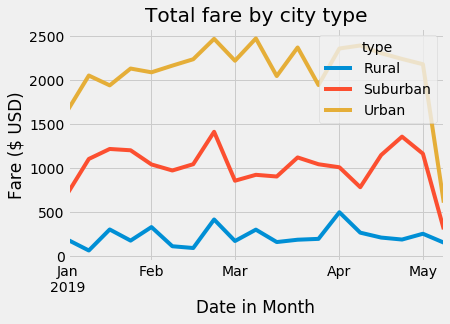

In [418]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
Anal_New_Dataframe_pyber_data_df_Week.plot()
plt.savefig("Total fare by City Type.png")
plt.title("Total fare by city type")
plt.ylabel("Fare ($ USD)")
plt.xlabel("Date in Month")
